<a href="https://colab.research.google.com/github/ludus94/Projects/blob/master/Copia_di_ML_Notebook(Nuovo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now go to the appropriate folder on your google drive. Note: you may need to change the folder name, depending on where on your drive you have the data files.

In [ ]:
import os
os.chdir('/content/drive/My Drive/finalproject')

Now open the dataset.


In [ ]:
import h5py
import numpy as np


f=h5py.File('training_set.h5', 'r')
# NOTE! We don't make a in-memory copy of the dataset... So we cannot close the file!

X1=f['X1']   # Tensor with first images in the pair
X2=f['X2']   # Tensor with second images in the pair
y=f['Y']     # Tensor with desired output

In [ ]:
#Test Reading

f1 = h5py.File('utk_dataset.h5', 'r')
x_test = f1['image']

f2 = h5py.File('utk_metadata.h5', 'r')
y_test = f2['ages']

OSError: ignored

Connect the Notebook to a Google Drive account

In [ ]:
import cv2
x_list = []

i = 0
while i < len(X1):
  img1=cv2.resize(X1[i],(64,64),interpolation=cv2.INTER_AREA)
  img2=cv2.resize(X2[i],(64,64),interpolation=cv2.INTER_AREA)
  x_list.append((img1, img2))
  i += 1

In [ ]:
from sklearn.model_selection import train_test_split

x_train = np.array(x_list)
y_train = np.array(y)


x_train, x_validation, y_train, y_validation = train_test_split(
    x_train, y_train, test_size=0.30, stratify=y_train)

print(x_train.shape, x_validation.shape, y_train.shape, y_validation.shape)

(31499, 2, 64, 64, 3) (13500, 2, 64, 64, 3) (31499, 3) (13500, 3)


In [ ]:
import numpy as np

def generate_batches(X_train, y_train, batch_size=64):
    n=X_train.shape[0]
    while True:
        # Choose a sample from the training set:
        # first, define the indices of the selected items
        indices=np.random.randint(0, n, size=batch_size)

        # Extract the batch
        x_batch_a = []
        x_batch_b = []
        i = 0
        while i < batch_size:
          x_batch_a.append(X_train[indices][i][0])
          x_batch_b.append(X_train[indices][i][1])
          i += 1

        
        x_batch_a = np.array(x_batch_a, dtype='float32')
        x_batch_b = np.array(x_batch_b, dtype='float32')
        y_batch = y_train[indices].astype('float32')

        #Normalize batch
        x_batch_a = x_batch_a / 255.0
        x_batch_b = x_batch_b / 255.0

        # Generate the random noise and add it to the samples
        #X_noise = np.random.normal(scale=stddev, size=X_batch.shape)
        #X_batch += X_noise

        # Clip the result so it is in the interval [0,255]
        #X_batch = X_batch.clip(0.0, 255.0)
        # Give the batch to the consumer
        yield ([x_batch_a, x_batch_b], y_batch)

In [ ]:
def batches_for_evaluation(x, y, batch_size=64):
  n = x.shape[0]
  start = 0
  stop = batch_size

  while True:
    # Choose a sample from the training set:
    # first, define the indices of the selected items
    indices=np.arange(start, stop)
    x_batch_a=[]
    x_batch_b=[]
    i=0
    while i<len(x[indices]):
        x_batch_a.append(x[indices][i][0])
        x_batch_b.append(x[indices][i][1])
        i+=1
    # Extract the batch
    x_batch_a = np.array(x_batch_a, dtype='float32')
    x_batch_b = np.array(x_batch_b, dtype='float32')
    y_batch = y[indices].astype('float32')

    # update index
    start = stop
    stop += batch_size
    if stop > n:
      stop = n
    #Normalize batch
    x_batch_a = x_batch_a / 255.0
    x_batch_b=x_batch_b/255.0
    # Give the batch to the consumer
    yield ([x_batch_a,x_batch_b], y_batch)

In [ ]:
def test_batches(x, y, batch_size=64):
    n=x[0].shape #23000
    while True:
        # Choose a sample from the training set:
        # first, define the indices of the selected items
        indices=np.random.randint(0, n, size=batch_size*2)

        # Extract the batch
        x_batch_a = []
        x_batch_b = []
        i = 0
        while i < batch_size*2:
          x_batch_a.append(x[indices[i]])
          x_batch_b.append(x[indices[i+1]])

          if y[indices[i]] > y[indices[i + 1]]:
            y_batch.append([0, 0, 1])
          elif y[indices[i]] < y[indices[i + 1]]:
            y_batch.append([1, 0, 0])
          else:
            y_batch.append([0, 1, 0])

          i += 2

        
        x_batch_a = np.array(x_batch_a, dtype='float32')
        x_batch_b = np.array(x_batch_b, dtype='float32')
        y_batch = y_batch.astype('float32')

        #Normalize batch
        x_batch_a = x_batch_a / 255.0
        x_batch_b = x_batch_b / 255.0

        # Generate the random noise and add it to the samples
        #X_noise = np.random.normal(scale=stddev, size=X_batch.shape)
        #X_batch += X_noise

        # Clip the result so it is in the interval [0,255]
        #X_batch = X_batch.clip(0.0, 255.0)
        # Give the batch to the consumer
        yield ([x_batch_a, x_batch_b], y_batch)

Show one of the images in the dataset

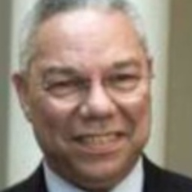

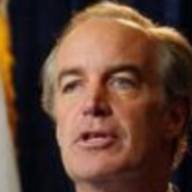

Desired output= [0 1 0]


In [ ]:
from PIL import Image
from IPython.display import display
import numpy as np

def show_image(arr):
  imdata=arr.astype('uint8')
  imdata=np.flip(imdata,-1)
  img=Image.fromarray(imdata)
  display(img)
index=23589
show_image(X1[index])
show_image(X2[index])
print('Desired output=',y[index])

In [ ]:
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPool2D, Dense, \
                      Dropout, Flatten, Reshape, Lambda, BatchNormalization,Concatenate
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

img_a = Input(shape=(64, 64, 3))
img_b = Input(shape=(64, 64, 3))
#First Layer (a)
conv1_a = Conv2D(32, kernel_size=(5, 5), activation="relu")(img_a)
conv1_a = MaxPool2D(pool_size=(3, 3))(conv1_a)
conv1_a = BatchNormalization(momentum=0.9)(conv1_a)
conv2_a = Conv2D(64, kernel_size=(3, 3), activation="relu")(conv1_a)
conv2_a = MaxPool2D(pool_size=(2, 2))(conv2_a)
conv2_a = BatchNormalization(momentum=0.9)(conv2_a)
fla=Flatten()(conv2_a)
#First Layer (b)
conv1_b = Conv2D(32, kernel_size=(5, 5), activation="relu")(img_b)
conv1_b = MaxPool2D(pool_size=(3, 3))(conv1_b)
conv1_b = BatchNormalization(momentum=0.9)(conv1_b)
conv2_b = Conv2D(64, kernel_size=(3, 3), activation="relu")(conv1_b)
conv2_b = MaxPool2D(pool_size=(2, 2))(conv2_b)
conv2_b = BatchNormalization(momentum=0.9)(conv2_b)
flb=Flatten()(conv2_b)
#First Layer
concatenate_layer = Concatenate()([fla, flb])


#First Layer
#conv1 = Conv2D(128, kernel_size=(7, 7), activation="relu",padding="same")(concatenate_layer)
#conv1 = MaxPool2D(pool_size=(3, 3))(conv1)
#conv1 = BatchNormalization(momentum=0.9)(conv1)

#Second Layer
#conv2 = Conv2D(128, kernel_size=(5, 5), activation="relu",padding="same")(conv1)
#conv2 = MaxPool2D(pool_size=(3, 3))(conv2)
#conv2 = BatchNormalization(momentum=0.9)(conv2)

#Third Layer
#conv3 = Conv2D(256, kernel_size=(3, 3), activation="relu",padding="same")(conv2)
#conv3 = MaxPool2D(pool_size=(2, 2))(conv3)
#conv3 = BatchNormalization(momentum=0.9)(conv3)
#fl = Flatten()(conv1)

#First Fully-connected
dense1 = Dense(64, activation='relu')(concatenate_layer)
dense1 = Dropout(rate=0.3)(dense1)
dense1 = BatchNormalization(momentum=0.9)(dense1)

#Second Fully-connected
dense2 = Dense(128, activation='relu')(dense1)
dense2 = Dropout(rate=0.4)(dense2)
dense2 = BatchNormalization(momentum=0.9)(dense2)

#Third Fully-connected
dense3 = Dense(3, activation='softmax')(dense2)

age_classifier = Model(inputs=[img_a,img_b], outputs=dense3)
age_classifier.summary()
age_classifier.save('age_classifier_v2(ludovico).model')

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 60, 60, 32)   2432        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 60, 60, 32)   2432        input_4[0][0]                    
____________________________________________________________________________________________

In [ ]:
import keras.models

age_classifier=keras.models.load_model('age_classifier_v2(ludovico).model')

OSError: ignored

In [ ]:
#{display-mode: "form" }

n_epochs = 100 #@param {type:"integer"}
batch_size =  128#@param {type:"integer"}
learning_rate = 0.009 #@param {type:"number"}
momentum = 0.9 #@param {type:"number"}
early_stopping = True #@param ["True", "False"] {type:"raw"}
patience =  5#@param {type:"integer"}


In [ ]:
from keras.optimizers import SGD,Adam
from keras.callbacks import EarlyStopping

opt=SGD(learning_rate,momentum)
age_classifier.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy'])
callbacks = [] if not early_stopping else [ EarlyStopping(
    monitor='val_loss',  
    patience=patience, 
    restore_best_weights=True
  )
]

In [ ]:
age_classifier.load_weights('age_classifier_weights_new_samples(ludovico).h5')

In [ ]:
train_size=x_train.shape[0]
validation_size = x_validation.shape[0]

history = age_classifier.fit_generator(generate_batches(x_train, y_train, batch_size), 
                                       steps_per_epoch=train_size/batch_size,
                                       epochs=n_epochs, 
                                       verbose=1,
                                       callbacks=callbacks,
                                       validation_data=generate_batches(x_validation, y_validation, batch_size),
                                       validation_steps=validation_size/batch_size,
                                       shuffle=True)

Epoch 1/100
247/246 [==============================] - 87s 351ms/step - loss: 0.3223 - acc: 0.8729 - val_loss: 0.7378 - val_acc: 0.7227
Epoch 2/100
247/246 [==============================] - 83s 337ms/step - loss: 0.3052 - acc: 0.8788 - val_loss: 0.7018 - val_acc: 0.7344
Epoch 3/100
247/246 [==============================] - 83s 336ms/step - loss: 0.2840 - acc: 0.8883 - val_loss: 0.8017 - val_acc: 0.6960
Epoch 4/100
247/246 [==============================] - 83s 336ms/step - loss: 0.2735 - acc: 0.8919 - val_loss: 0.6879 - val_acc: 0.7431
Epoch 5/100
247/246 [==============================] - 83s 336ms/step - loss: 0.2558 - acc: 0.9007 - val_loss: 0.6874 - val_acc: 0.7425
Epoch 6/100
247/246 [==============================] - 84s 338ms/step - loss: 0.2401 - acc: 0.9048 - val_loss: 0.7613 - val_acc: 0.7297
Epoch 7/100
247/246 [==============================] - 84s 339ms/step - loss: 0.2313 - acc: 0.9105 - val_loss: 0.7270 - val_acc: 0.7454
Epoch 8/100
247/246 [===========================

In [ ]:
age_classifier.save_weights("age_classifier_weights_new_samples(ludovico).h5")

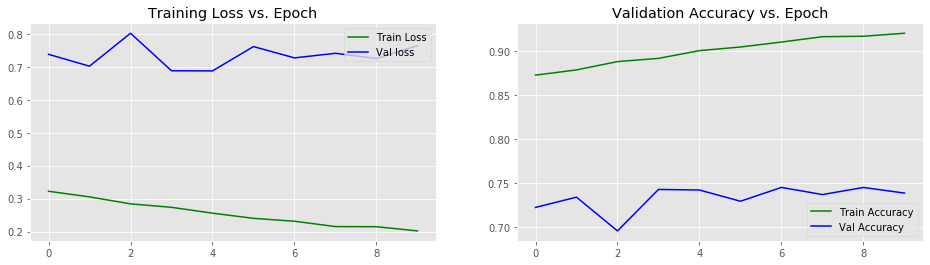

In [ ]:
# For visually better looking plots
import matplotlib.pyplot as plt
# Changing default figure size for properly accomodating images
from pylab import rcParams
rcParams['figure.figsize'] = (16, 4)
plt.style.use('ggplot')

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.set_title('Training Loss vs. Epoch')
ax2.set_title('Validation Accuracy vs. Epoch')

ax1.plot(history.history['loss'], color='green', label='Train Loss')
ax1.plot(history.history['val_loss'], color='blue', label='Val loss')

ax2.plot(history.history['acc'], color='green', label='Train Accuracy')
ax2.plot(history.history['val_acc'], color='blue', label='Val Accuracy')

ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
plt.show()


In [ ]:
train_size=x_train.shape[0]
validation_size = x_validation.shape[0]
#test_size = x_test.shape[0]

print(train_size, validation_size)

# Score trained model.
scores = age_classifier.evaluate_generator(batches_for_evaluation(x_train, 
                                                                  y_train, 
                                                                  batch_size), 
                                           steps=train_size/batch_size, 
                                           verbose=0, 
                                           use_multiprocessing=True)
print('Training loss:', scores[0])
print('Training accuracy:', scores[1])

scores = age_classifier.evaluate_generator(batches_for_evaluation(x_validation, 
                                                                  y_validation, 
                                                                  batch_size), 
                                           steps=validation_size/batch_size, 
                                           verbose=0, 
                                           use_multiprocessing=True)
print('\nValidation loss:', scores[0])
print('Validation accuracy:', scores[1])

#scores = age_classifier.evaluate_generator(test_batches(x_test, y_test,
#                                                        batch_size), 
#                                           steps=test_size/batch_size, 
#                                           verbose=0, 
#                                           use_multiprocessing=True)
#print('\nTest loss:', scores[0])
#print('Test accuracy:', scores[1])

31499 13500
Training loss: 0.15860383370594658
Training accuracy: 0.9455220800660339

Validation loss: 0.689928430557251
Validation accuracy: 0.7397777778484204
